In [34]:
# Get resources
import numpy as np
import pmomstuff4 as pm
import scipy.io
import matplotlib.pyplot as plt
%matplotlib notebook

In [35]:
# Get filenames -- make sure temperatures in paths are correct
matNpmomfilename = "../../../../Data/BL_hybrid_CRIs/hybrid_BL_273/Npmomarrayfile.mat"
matpmomfilename =  "../../../../Data/BL_hybrid_CRIs/hybrid_BL_273/pmomarrayfile.mat"
ncfilename = "../../../../Data/BL_hybrid_CRIs/hybrid_BL_273/ssp_getpsd_T273_S331_pmom.nc"

In [36]:
# Get the netcdf data
Npmomarray, pmomarray, \
wnum_mesh, reff_mesh, w0_mesh, qext_mesh, asym_mesh, \
wnum_list, reff_list, maxdim_list, volume_list, parea_list = \
pm.pmomload2(ncfilename)

In [37]:
# Get the matlab-generated moments
matNpmom = scipy.io.loadmat(matNpmomfilename)
matpmom = scipy.io.loadmat(matpmomfilename)

In [38]:
print matpmom['pmomarray'].shape
print matNpmom['Npmomarray'].shape
print pmomarray.shape
print Npmomarray.shape
print Npmomarray[30,:]

(70, 247, 40)
(247, 40)
(40, 265, 1000)
(40, 265)
[  21   20   33   31   30   30   31   37   36   40   42   44   47   48   51
   55   75   75   78   76   75   77   77   78   79   81   83   85   87   90
   94   99  108  107  108  150  151  151  151  152  151  152  153  150  154
  152  154  153  154  155  156  157  158  160  162  163  166  167  170  172
  178  225  224  226  224  226  223  228  226  226  226  228  228  230  229
  233  233  234  238  239  241  246  249  259  258  296  300  389  363  323
  296  283  377  358  301  292  295  295  298  308  317  324  327  321  377
  445  315  306  315  336  369  402  320  323  333  344  356  359  363  379
  380  381  382  383  388  388  391  394  436  429  439  413  441  441  433
  433  430  435  445  445  447  448  450  433  433  442  444  444  446  456
  459  461  464  451  452  452  455  458  462  464  467  474  504  513  508
  494  512  513  516  520  530  530  531  532  579  579  579  580  580  581
  582  583  584  584  585  586  587  5

from matlab 37
from fortran 47


<IPython.core.display.Javascript object>


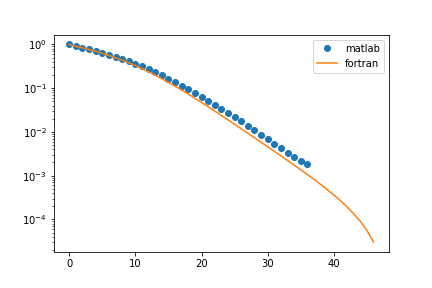

In [44]:
i_reff = 23
i_wnum = 30

N_frommatlab = matNpmom['Npmomarray'][i_wnum,i_reff]; print "from matlab", N_frommatlab
n_frommatlab = [i for i in range(N_frommatlab)]
p_frommatlab = np.squeeze(matpmom['pmomarray'][n_frommatlab,i_wnum,i_reff])

N_fromfortran = Npmomarray[i_reff,i_wnum]; print "from fortran", N_fromfortran
n_fromfortran = [i for i in range(N_fromfortran)] 
p_fromfortran = np.squeeze(pmomarray[i_reff,i_wnum,n_fromfortran])

plt.figure()
plt.semilogy(n_frommatlab,p_frommatlab,'o',n_fromfortran,p_fromfortran)
plt.legend(['matlab', 'fortran'])
plt.show()

In [40]:
asym_mesh

array([[ 0.001101,  0.001665,  0.002353, ...,  0.781215,  0.78179 ,
         0.782376],
       [ 0.002457,  0.003713,  0.005248, ...,  0.840841,  0.840864,
         0.840912],
       [ 0.004404,  0.006655,  0.009407, ...,  0.857079,  0.856691,
         0.856324],
       ..., 
       [ 0.742183,  0.789969,  0.816573, ...,  0.914067,  0.910974,
         0.909201],
       [ 0.752791,  0.797221,  0.821651, ...,  0.91551 ,  0.912357,
         0.910547],
       [ 0.762013,  0.803429,  0.825988, ...,  0.916879,  0.913666,
         0.911819]])